Make sure you run this jupyter notebook in its directory (i.e. `src/demo`)

# Environment

1.

```
pip install torch torchvision numpy timm matplotlib scipy pyyaml tqdm
```

2. (In main directory but not in `src`)

```
pip install -e .
```

Run below cell to setup the environment.

In [1]:
from src import inference
from PIL import Image
import matplotlib.pyplot as plt
model = inference.load_model("../checkpoint/model_random_crop_63.pt", 64, 5)

/home/wyy603/env20240629/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


This cell pachifies `src/demo/image.png` into `src/demo/pachify/{0-25}.png`. The pachifies are shuffled.

See `src/demo/samples` for some images from `DIV2K` dataset and a handwriting image. You can copy it to `src/demo/image.png` and experiment.

qwq


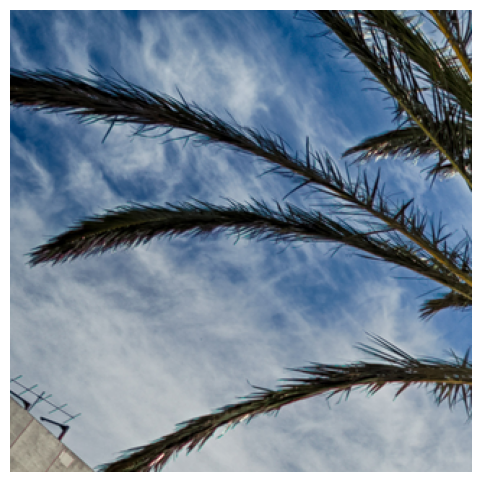

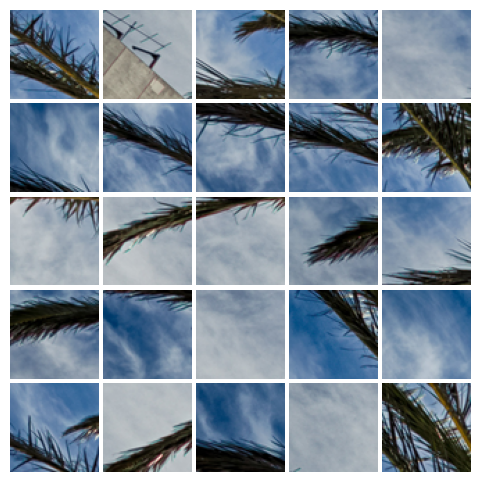

In [2]:
if not inference.pachify("image.png", "pachify", 5, 64):
    plt.figure(figsize=(6, 6))
    plt.imshow(Image.open("image.png").crop((0, 0, 320, 320)))
    plt.axis('off')
    plt.show()

    images = []
    for i in range(25):
        images.append(Image.open(f"pachify/{i}.png"))

    fig, axes = plt.subplots(5, 5, figsize=(6, 6), gridspec_kw={'hspace': 0.05})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0.05)
    plt.show()

Run this cell to calculate the correct permutation.

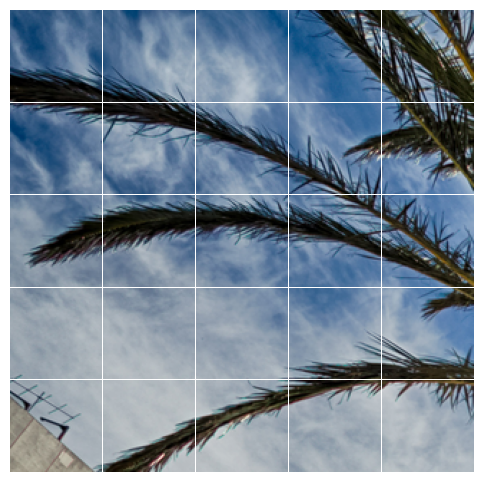

In [3]:
perm = inference.inference("pachify", model, 5, 64)

images = []
p = [0] * 25
for i in range(25):
    p[perm[0][i].item()] = i
for i in range(25):
    images.append(Image.open(f"pachify/{p[i]}.png"))

fig, axes = plt.subplots(5, 5, figsize=(6, 6), gridspec_kw={'hspace': 0.01})
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
plt.subplots_adjust(wspace=0, hspace=0.01)
plt.show()